# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [48]:
def plot_stats(stat, title=None, save=False, filename=None):
    stats, keys, run_time, _, _, _, _ = stat
    fig, axs = plt.subplots(2,1, figsize=(6,8))
    
    if title is not None:
        learn_rate = title.split(",")[0]
        plt.suptitle("Learning rate= " + learn_rate)

    for k in ['error(train)', 'error(valid)']:
        axs[0].plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    axs[0].legend(loc=0)
    axs[0].set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    for k in ['acc(train)', 'acc(valid)']:
        axs[1].plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    axs[1].legend(loc=0)
    axs[1].set_xlabel('Epoch number')
    
    if(save):
        plt.savefig(filename + ".pdf")

In [14]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=200, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=200, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f269132e0f0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f2690d564e0>)


KeysView(<numpy.lib.npyio.NpzFile object at 0x7f26905e7320>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f2690e26a20>)
Starting sesh for learn= 1 and batch= 100


Epoch 20: 1.0s to complete
    error(train)=5.48e-01, acc(train)=8.15e-01, error(valid)=7.72e-01, acc(valid)=7.82e-01


Epoch 40: 1.0s to complete
    error(train)=5.02e-01, acc(train)=8.34e-01, error(valid)=8.15e-01, acc(valid)=7.88e-01


Epoch 60: 1.0s to complete
    error(train)=5.41e-01, acc(train)=8.30e-01, error(valid)=9.19e-01, acc(valid)=7.78e-01


Epoch 80: 1.0s to complete
    error(train)=5.18e-01, acc(train)=8.33e-01, error(valid)=9.83e-01, acc(valid)=7.74e-01


Epoch 100: 1.0s to complete
    error(train)=5.29e-01, acc(train)=8.23e-01, error(valid)=9.99e-01, acc(valid)=7.69e-01


Epoch 120: 1.0s to complete
    error(train)=5.23e-01, acc(train)=8.32e-01, error(valid)=1.08e+00, acc(valid)=7.70e-01


Epoch 140: 1.0s to complete
    error(train)=5.71e-01, acc(train)=8.24e-01, error(valid)=1.16e+00, acc(valid)=7.66e-01


Epoch 160: 1.0s to complete
    error(train)=5.23e-01, acc(train)=8.42e-01, error(valid)=1.20e+00, acc(valid)=7.77e-01


Epoch 180: 1.0s to complete
    error(train)=5.80e-01, acc(train)=8.31e-01, error(valid)=1.23e+00, acc(valid)=7.67e-01


Epoch 200: 1.0s to complete
    error(train)=6.57e-01, acc(train)=8.23e-01, error(valid)=1.37e+00, acc(valid)=7.56e-01



Starting sesh for learn= 0.5 and batch= 100


Epoch 20: 1.0s to complete
    error(train)=3.45e-01, acc(train)=8.70e-01, error(valid)=6.17e-01, acc(valid)=8.18e-01


Epoch 40: 1.0s to complete
    error(train)=3.20e-01, acc(train)=8.79e-01, error(valid)=7.31e-01, acc(valid)=8.11e-01


Epoch 60: 1.0s to complete
    error(train)=3.04e-01, acc(train)=8.82e-01, error(valid)=8.19e-01, acc(valid)=8.05e-01


Epoch 80: 1.2s to complete
    error(train)=3.19e-01, acc(train)=8.80e-01, error(valid)=9.32e-01, acc(valid)=8.01e-01


Epoch 100: 1.0s to complete
    error(train)=3.29e-01, acc(train)=8.84e-01, error(valid)=1.06e+00, acc(valid)=7.98e-01


Epoch 120: 1.0s to complete
    error(train)=3.25e-01, acc(train)=8.84e-01, error(valid)=1.11e+00, acc(valid)=8.00e-01


Epoch 140: 1.0s to complete
    error(train)=3.28e-01, acc(train)=8.84e-01, error(valid)=1.19e+00, acc(valid)=7.93e-01


Epoch 160: 1.0s to complete
    error(train)=3.34e-01, acc(train)=8.82e-01, error(valid)=1.24e+00, acc(valid)=7.98e-01


Epoch 180: 1.0s to complete
    error(train)=3.35e-01, acc(train)=8.84e-01, error(valid)=1.39e+00, acc(valid)=7.89e-01


Epoch 200: 1.0s to complete
    error(train)=3.97e-01, acc(train)=8.73e-01, error(valid)=1.46e+00, acc(valid)=7.84e-01



Starting sesh for learn= 0.1 and batch= 100


Epoch 20: 1.1s to complete
    error(train)=3.36e-01, acc(train)=8.81e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


Epoch 40: 1.1s to complete
    error(train)=2.56e-01, acc(train)=9.04e-01, error(valid)=5.52e-01, acc(valid)=8.37e-01


Epoch 60: 1.2s to complete
    error(train)=2.19e-01, acc(train)=9.16e-01, error(valid)=6.46e-01, acc(valid)=8.28e-01


Epoch 80: 1.1s to complete
    error(train)=1.74e-01, acc(train)=9.31e-01, error(valid)=7.39e-01, acc(valid)=8.27e-01


Epoch 100: 1.1s to complete
    error(train)=1.67e-01, acc(train)=9.33e-01, error(valid)=8.54e-01, acc(valid)=8.19e-01


Epoch 120: 1.1s to complete
    error(train)=1.78e-01, acc(train)=9.29e-01, error(valid)=1.01e+00, acc(valid)=8.05e-01


Epoch 140: 1.1s to complete
    error(train)=1.56e-01, acc(train)=9.37e-01, error(valid)=1.10e+00, acc(valid)=8.12e-01


Epoch 160: 1.1s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=1.21e+00, acc(valid)=8.05e-01


Epoch 180: 1.1s to complete
    error(train)=1.31e-01, acc(train)=9.47e-01, error(valid)=1.31e+00, acc(valid)=8.07e-01


Epoch 200: 1.1s to complete
    error(train)=1.40e-01, acc(train)=9.43e-01, error(valid)=1.44e+00, acc(valid)=8.03e-01



Starting sesh for learn= 0.05 and batch= 100


Epoch 20: 1.1s to complete
    error(train)=4.10e-01, acc(train)=8.59e-01, error(valid)=5.14e-01, acc(valid)=8.31e-01


Epoch 40: 1.2s to complete
    error(train)=3.22e-01, acc(train)=8.87e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


Epoch 60: 1.1s to complete
    error(train)=2.67e-01, acc(train)=9.02e-01, error(valid)=5.38e-01, acc(valid)=8.37e-01


Epoch 80: 1.1s to complete
    error(train)=2.30e-01, acc(train)=9.14e-01, error(valid)=5.86e-01, acc(valid)=8.31e-01


Epoch 100: 1.1s to complete
    error(train)=2.09e-01, acc(train)=9.20e-01, error(valid)=6.40e-01, acc(valid)=8.27e-01


Epoch 120: 1.1s to complete
    error(train)=1.83e-01, acc(train)=9.31e-01, error(valid)=7.06e-01, acc(valid)=8.26e-01


Epoch 140: 1.1s to complete
    error(train)=1.63e-01, acc(train)=9.39e-01, error(valid)=7.71e-01, acc(valid)=8.21e-01


Epoch 160: 1.1s to complete
    error(train)=1.57e-01, acc(train)=9.39e-01, error(valid)=8.59e-01, acc(valid)=8.20e-01


Epoch 180: 1.1s to complete
    error(train)=1.41e-01, acc(train)=9.45e-01, error(valid)=9.31e-01, acc(valid)=8.12e-01


Epoch 200: 1.1s to complete
    error(train)=1.29e-01, acc(train)=9.49e-01, error(valid)=1.01e+00, acc(valid)=8.11e-01



Starting sesh for learn= 0.01 and batch= 100


Epoch 20: 1.1s to complete
    error(train)=7.00e-01, acc(train)=7.91e-01, error(valid)=7.30e-01, acc(valid)=7.82e-01


Epoch 40: 1.0s to complete
    error(train)=5.37e-01, acc(train)=8.32e-01, error(valid)=5.95e-01, acc(valid)=8.15e-01


Epoch 60: 1.0s to complete
    error(train)=4.64e-01, acc(train)=8.50e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


Epoch 80: 1.0s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=5.23e-01, acc(valid)=8.34e-01


Epoch 100: 1.1s to complete
    error(train)=3.84e-01, acc(train)=8.72e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


Epoch 120: 1.1s to complete
    error(train)=3.60e-01, acc(train)=8.79e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


Epoch 140: 1.1s to complete
    error(train)=3.40e-01, acc(train)=8.84e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


Epoch 160: 1.0s to complete
    error(train)=3.25e-01, acc(train)=8.89e-01, error(valid)=5.13e-01, acc(valid)=8.38e-01


Epoch 180: 1.1s to complete
    error(train)=3.05e-01, acc(train)=8.95e-01, error(valid)=5.13e-01, acc(valid)=8.40e-01


Epoch 200: 1.0s to complete
    error(train)=2.95e-01, acc(train)=8.98e-01, error(valid)=5.27e-01, acc(valid)=8.39e-01



Starting sesh for learn= 0.005 and batch= 100


Epoch 20: 1.0s to complete
    error(train)=9.13e-01, acc(train)=7.36e-01, error(valid)=9.22e-01, acc(valid)=7.33e-01


Epoch 40: 1.0s to complete
    error(train)=7.06e-01, acc(train)=7.89e-01, error(valid)=7.30e-01, acc(valid)=7.80e-01


Epoch 60: 1.0s to complete
    error(train)=6.06e-01, acc(train)=8.14e-01, error(valid)=6.45e-01, acc(valid)=8.02e-01


Epoch 80: 1.0s to complete
    error(train)=5.43e-01, acc(train)=8.31e-01, error(valid)=5.94e-01, acc(valid)=8.14e-01


Epoch 100: 1.0s to complete
    error(train)=5.00e-01, acc(train)=8.42e-01, error(valid)=5.64e-01, acc(valid)=8.21e-01


Epoch 120: 1.0s to complete
    error(train)=4.72e-01, acc(train)=8.47e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


Epoch 140: 1.1s to complete
    error(train)=4.44e-01, acc(train)=8.57e-01, error(valid)=5.29e-01, acc(valid)=8.32e-01


Epoch 160: 1.0s to complete
    error(train)=4.22e-01, acc(train)=8.63e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


Epoch 180: 1.0s to complete
    error(train)=4.02e-01, acc(train)=8.69e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


Epoch 200: 1.0s to complete
    error(train)=3.88e-01, acc(train)=8.72e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01



Starting sesh for learn= 0.001 and batch= 100


Epoch 20: 1.0s to complete
    error(train)=1.47e+00, acc(train)=5.98e-01, error(valid)=1.47e+00, acc(valid)=5.98e-01


Epoch 40: 1.0s to complete
    error(train)=1.20e+00, acc(train)=6.64e-01, error(valid)=1.21e+00, acc(valid)=6.61e-01


Epoch 60: 1.0s to complete
    error(train)=1.07e+00, acc(train)=6.98e-01, error(valid)=1.08e+00, acc(valid)=6.93e-01


Epoch 80: 1.0s to complete
    error(train)=9.72e-01, acc(train)=7.23e-01, error(valid)=9.82e-01, acc(valid)=7.19e-01


Epoch 100: 1.0s to complete
    error(train)=8.93e-01, acc(train)=7.44e-01, error(valid)=9.05e-01, acc(valid)=7.39e-01


Epoch 120: 1.0s to complete
    error(train)=8.31e-01, acc(train)=7.60e-01, error(valid)=8.45e-01, acc(valid)=7.54e-01


Epoch 140: 1.0s to complete
    error(train)=7.81e-01, acc(train)=7.73e-01, error(valid)=7.98e-01, acc(valid)=7.66e-01


Epoch 160: 1.0s to complete
    error(train)=7.40e-01, acc(train)=7.83e-01, error(valid)=7.59e-01, acc(valid)=7.77e-01


Epoch 180: 1.1s to complete
    error(train)=7.07e-01, acc(train)=7.91e-01, error(valid)=7.29e-01, acc(valid)=7.83e-01


Epoch 200: 1.0s to complete
    error(train)=6.79e-01, acc(train)=7.97e-01, error(valid)=7.04e-01, acc(valid)=7.90e-01


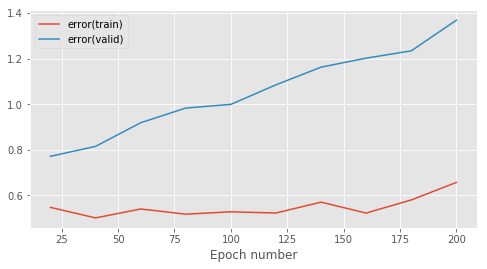

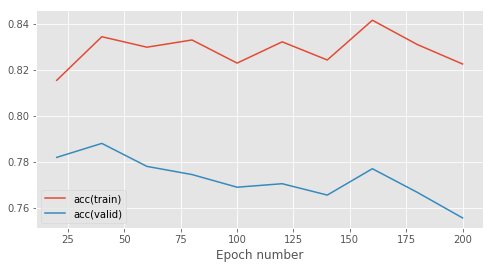

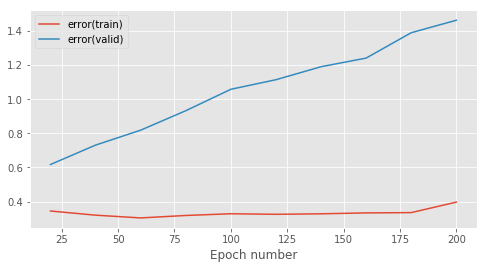

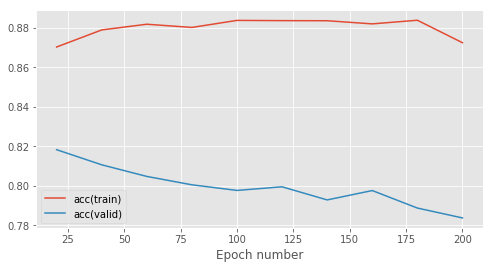

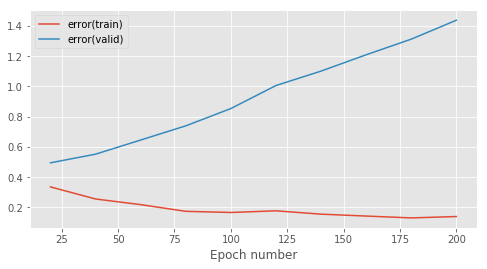

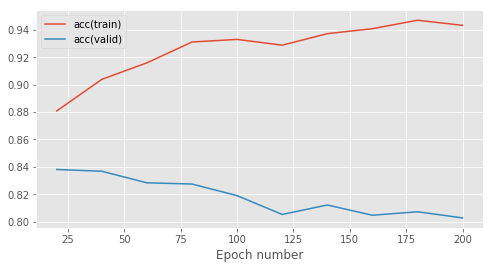

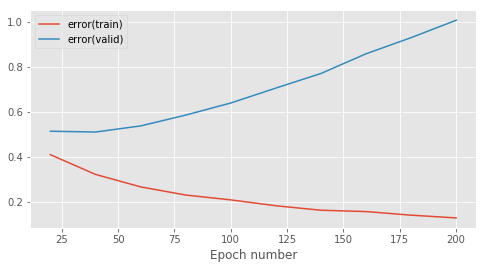

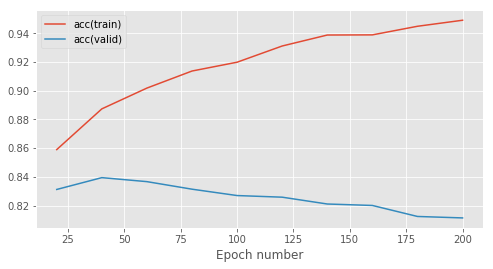

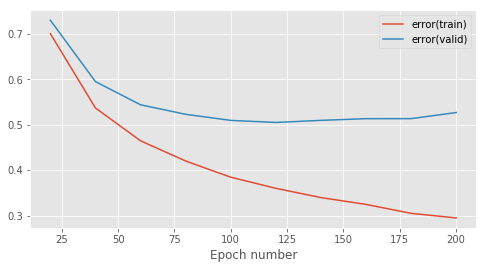

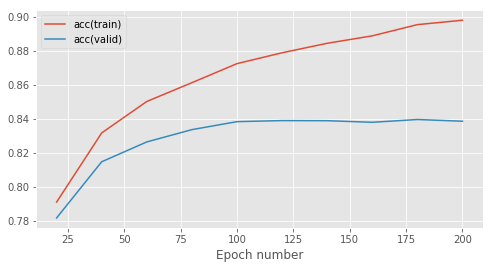

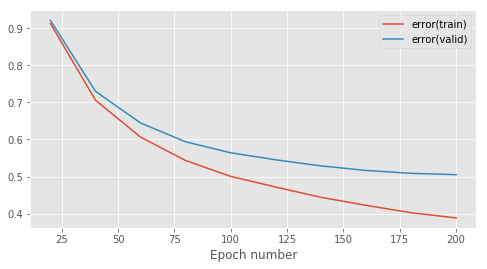

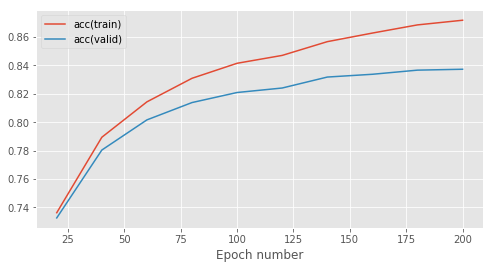

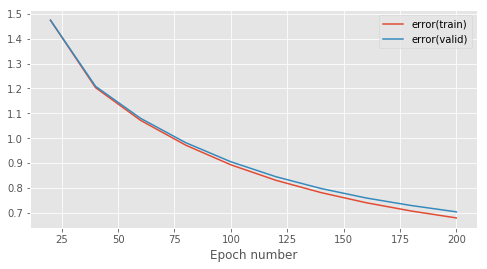

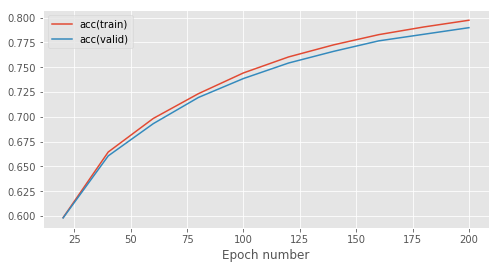

In [31]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learn_rates = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
batch = 100

# learning_rate = 0.01
num_epochs = 200
stats_interval = 20
input_dim, output_dim, hidden_dim = 784, 47, 100

train_data = EMNISTDataProvider('train', batch_size=batch, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch, rng=rng)

results = []
results_str = []

for each in learn_rates:

    print("Starting sesh for learn=", each, "and batch=", batch)
    train_data.reset()
    valid_data.reset()
    learning_rate = each
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    res = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

    results.append(res)
    results_str.append(str(learning_rate) + "," + str(batch))

Learing rate: 1
Training time is 205.20234417915344
Error in train 0.6570656291827265
Error in valid 1.368050154118663
Learing rate: 0.5
Training time is 211.74835467338562
Error in train 0.3968932311026691
Error in valid 1.4627270446049452
Learing rate: 0.1
Training time is 226.2973551750183
Error in train 0.14004141681855733
Error in valid 1.437518566758582
Learing rate: 0.05
Training time is 225.2358946800232
Error in train 0.1285358797734453
Error in valid 1.0080062193905805
Learing rate: 0.01
Training time is 218.47735381126404
Error in train 0.2948630865535162
Error in valid 0.5265805188600136
Learing rate: 0.005
Training time is 212.88105463981628
Error in train 0.3884389194498756
Error in valid 0.5050869058011562
Learing rate: 0.001
Training time is 214.19422960281372
Error in train 0.6792576578970012
Error in valid 0.7037195529025555


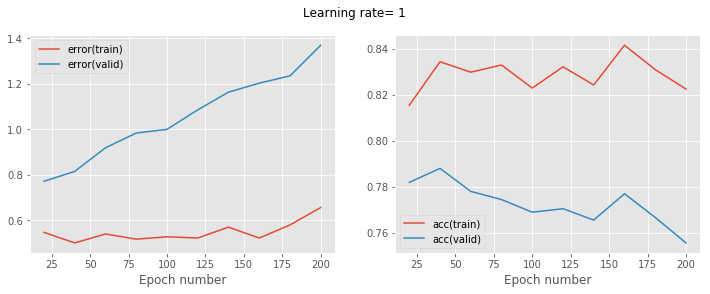

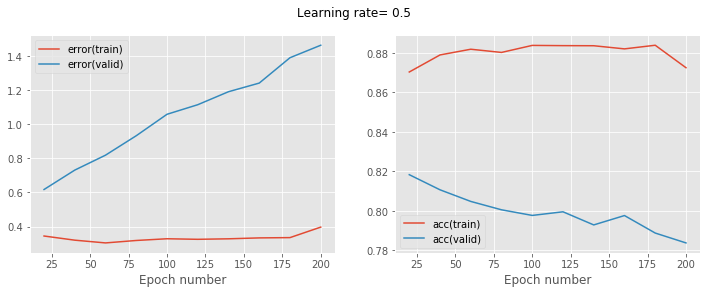

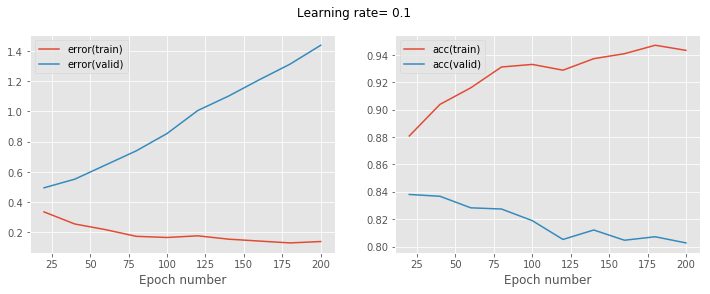

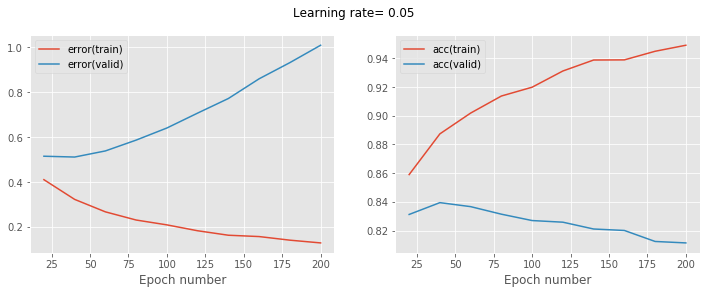

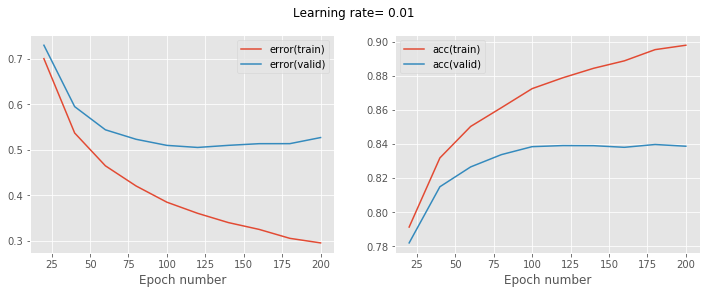

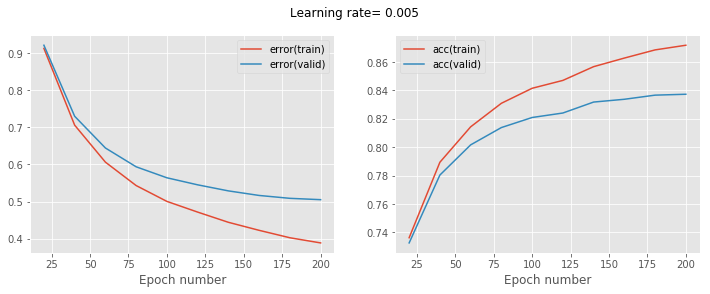

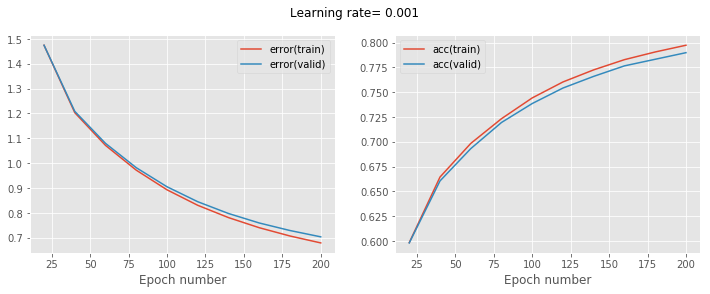

In [36]:
# Go over all experiments and plots stats of each along with their plots

for idx, each in enumerate(results):
    stats, keys, run_time, _, _, _, _ = each
    error_valid = stats[:,keys['error(valid)']][-1]
    error_train = stats[:,keys['error(train)']][-1]
    print("Learing rate:", learn_rates[idx])
    print("Training time is", each[2])
    print("Error in train", error_train)
    print("Error in valid", error_valid)
    plot_stats(each, results_str[idx])
        

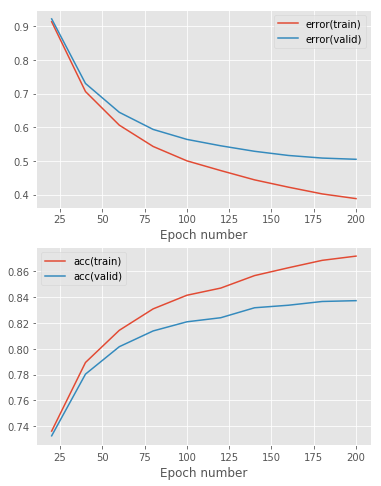

In [49]:
# save the best one
res = results[-2]
plot_stats(res, None, True, "ex1_learn_rate")

# Experiment 2
Multiple hidden layers

In [50]:
model2 = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

model3 = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

model4 = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

model5 = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

models = {2:model2, 
         3:model3,
         4:model4,
         5:model5}

Training with 2 hidden layers


Epoch 20: 1.1s to complete
    error(train)=8.01e-01, acc(train)=7.58e-01, error(valid)=8.20e-01, acc(valid)=7.52e-01


Epoch 40: 1.2s to complete
    error(train)=6.01e-01, acc(train)=8.13e-01, error(valid)=6.42e-01, acc(valid)=7.98e-01


Epoch 60: 1.2s to complete
    error(train)=5.20e-01, acc(train)=8.33e-01, error(valid)=5.83e-01, acc(valid)=8.11e-01


Epoch 80: 1.2s to complete
    error(train)=4.61e-01, acc(train)=8.48e-01, error(valid)=5.45e-01, acc(valid)=8.23e-01


Epoch 100: 1.2s to complete
    error(train)=4.24e-01, acc(train)=8.58e-01, error(valid)=5.27e-01, acc(valid)=8.30e-01


Epoch 120: 1.2s to complete
    error(train)=3.93e-01, acc(train)=8.68e-01, error(valid)=5.14e-01, acc(valid)=8.33e-01


Epoch 140: 1.3s to complete
    error(train)=3.71e-01, acc(train)=8.72e-01, error(valid)=5.14e-01, acc(valid)=8.32e-01


Epoch 160: 1.2s to complete
    error(train)=3.46e-01, acc(train)=8.82e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


Epoch 180: 1.2s to complete
    error(train)=3.40e-01, acc(train)=8.82e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


Epoch 200: 1.3s to complete
    error(train)=3.17e-01, acc(train)=8.90e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01



Training with 3 hidden layers


Epoch 20: 1.3s to complete
    error(train)=7.31e-01, acc(train)=7.75e-01, error(valid)=7.59e-01, acc(valid)=7.68e-01


Epoch 40: 1.4s to complete
    error(train)=5.48e-01, acc(train)=8.24e-01, error(valid)=6.02e-01, acc(valid)=8.11e-01


Epoch 60: 1.5s to complete
    error(train)=4.63e-01, acc(train)=8.47e-01, error(valid)=5.39e-01, acc(valid)=8.25e-01


Epoch 80: 1.5s to complete
    error(train)=4.09e-01, acc(train)=8.62e-01, error(valid)=5.10e-01, acc(valid)=8.32e-01


Epoch 100: 1.4s to complete
    error(train)=3.79e-01, acc(train)=8.70e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


Epoch 120: 1.4s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


Epoch 140: 1.4s to complete
    error(train)=3.27e-01, acc(train)=8.86e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


Epoch 160: 1.5s to complete
    error(train)=3.06e-01, acc(train)=8.93e-01, error(valid)=5.07e-01, acc(valid)=8.40e-01


Epoch 180: 1.6s to complete
    error(train)=2.86e-01, acc(train)=9.01e-01, error(valid)=5.18e-01, acc(valid)=8.38e-01


Epoch 200: 1.5s to complete
    error(train)=2.78e-01, acc(train)=9.01e-01, error(valid)=5.37e-01, acc(valid)=8.34e-01



Training with 4 hidden layers


Epoch 20: 1.5s to complete
    error(train)=6.80e-01, acc(train)=7.87e-01, error(valid)=7.04e-01, acc(valid)=7.82e-01


Epoch 40: 1.6s to complete
    error(train)=5.16e-01, acc(train)=8.31e-01, error(valid)=5.76e-01, acc(valid)=8.15e-01


Epoch 60: 1.6s to complete
    error(train)=4.45e-01, acc(train)=8.51e-01, error(valid)=5.43e-01, acc(valid)=8.23e-01


Epoch 80: 1.7s to complete
    error(train)=3.93e-01, acc(train)=8.67e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


Epoch 100: 1.7s to complete
    error(train)=3.63e-01, acc(train)=8.72e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


Epoch 120: 1.8s to complete
    error(train)=3.24e-01, acc(train)=8.86e-01, error(valid)=5.20e-01, acc(valid)=8.36e-01


Epoch 140: 1.6s to complete
    error(train)=3.00e-01, acc(train)=8.92e-01, error(valid)=5.29e-01, acc(valid)=8.34e-01


Epoch 160: 1.6s to complete
    error(train)=2.80e-01, acc(train)=8.99e-01, error(valid)=5.42e-01, acc(valid)=8.37e-01


Epoch 180: 1.8s to complete
    error(train)=2.61e-01, acc(train)=9.05e-01, error(valid)=5.56e-01, acc(valid)=8.36e-01


Epoch 200: 1.8s to complete
    error(train)=2.46e-01, acc(train)=9.09e-01, error(valid)=5.82e-01, acc(valid)=8.32e-01



Training with 5 hidden layers


Epoch 20: 1.7s to complete
    error(train)=6.67e-01, acc(train)=7.90e-01, error(valid)=7.05e-01, acc(valid)=7.79e-01


Epoch 40: 1.8s to complete
    error(train)=4.91e-01, acc(train)=8.39e-01, error(valid)=5.68e-01, acc(valid)=8.15e-01


Epoch 60: 1.8s to complete
    error(train)=4.14e-01, acc(train)=8.60e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01


Epoch 80: 1.9s to complete
    error(train)=3.68e-01, acc(train)=8.72e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


Epoch 100: 1.8s to complete
    error(train)=3.39e-01, acc(train)=8.79e-01, error(valid)=5.35e-01, acc(valid)=8.34e-01


Epoch 120: 1.7s to complete
    error(train)=3.09e-01, acc(train)=8.87e-01, error(valid)=5.43e-01, acc(valid)=8.33e-01


Epoch 140: 1.8s to complete
    error(train)=2.76e-01, acc(train)=9.00e-01, error(valid)=5.52e-01, acc(valid)=8.35e-01


Epoch 160: 1.9s to complete
    error(train)=2.57e-01, acc(train)=9.05e-01, error(valid)=5.76e-01, acc(valid)=8.33e-01


Epoch 180: 2.0s to complete
    error(train)=2.33e-01, acc(train)=9.13e-01, error(valid)=5.98e-01, acc(valid)=8.33e-01


Epoch 200: 1.7s to complete
    error(train)=2.21e-01, acc(train)=9.15e-01, error(valid)=6.32e-01, acc(valid)=8.31e-01


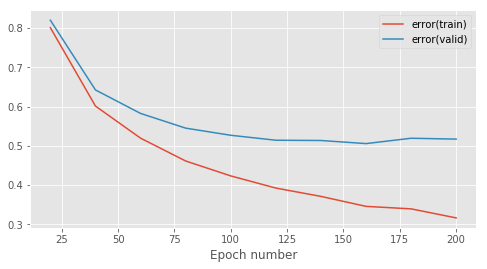

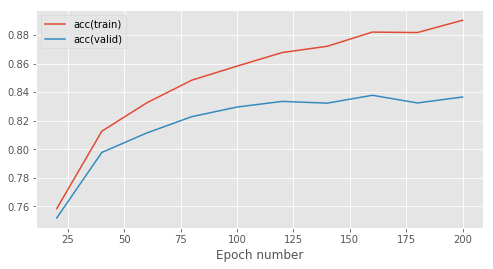

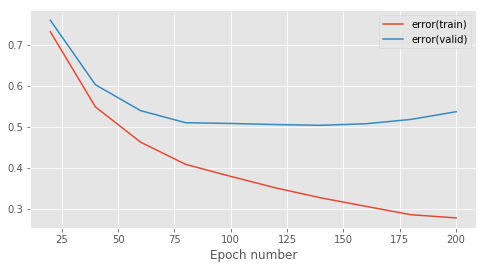

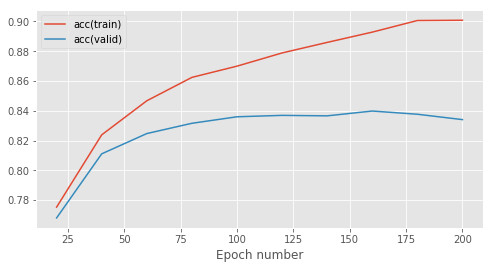

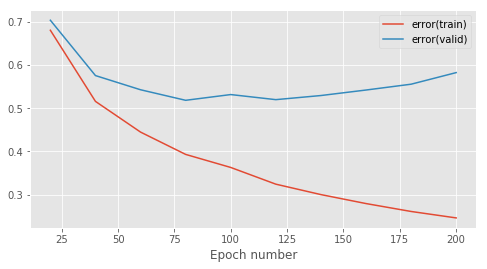

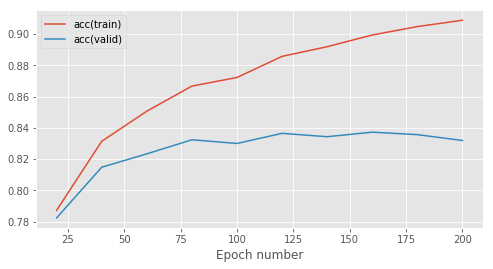

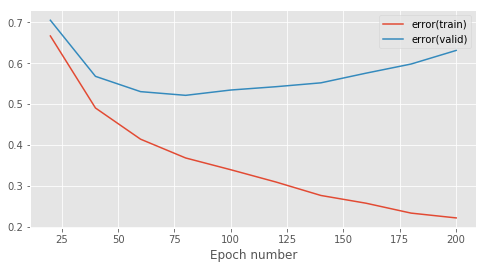

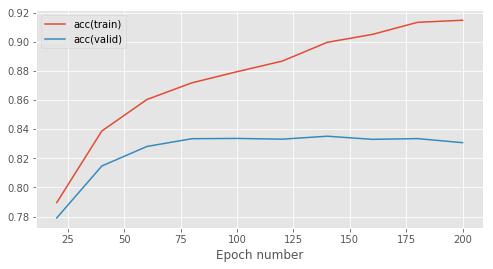

In [52]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.005
batch = 100
num_epochs = 200
stats_interval = 20
input_dim, output_dim, hidden_dim = 784, 47, 100

hidden_layers_results = []
hidden_layers_results_str = []

for key, model in models.items():
    
    print("Training with", key, "hidden layers")

    train_data.reset()
    valid_data.reset()
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    res = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

    results.append(res)
    results_str.append(key)

Number of hidden layers 2
Training time is 248.96264743804932
Error in train 0.3165134852924402
Error in valid 0.5172405058958703
Number of hidden layers 3
Training time is 294.68283891677856
Error in train 0.2780965276855494
Error in valid 0.5366939860626402
Number of hidden layers 4
Training time is 330.8650748729706
Error in train 0.2463562551746943
Error in valid 0.5824879917393566
Number of hidden layers 5
Training time is 366.9557695388794
Error in train 0.2214470436925334
Error in valid 0.631580866777723


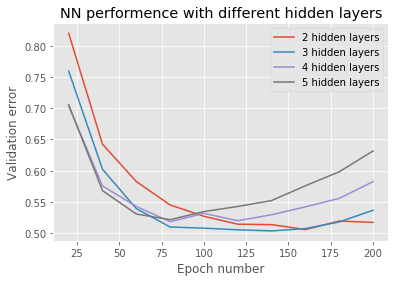

In [63]:
# plot the results from the above experiment

fig_1 = plt.figure(figsize=(6, 4))
ax_1 = fig_1.add_subplot(111)

for idx, each in enumerate(results[-4:]):
    stats, keys, run_time, _, _, _, _ = each
    error_valid = stats[:,keys['error(valid)']][-1]
    error_train = stats[:,keys['error(train)']][-1]
    print("Number of hidden layers", results_str[idx-4])
    print("Training time is", each[2])
    print("Error in train", error_train)
    print("Error in valid", error_valid)
    ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
              stats[1:, keys["error(valid)"]], label=str(results_str[idx-4]) + " hidden layers")
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Validation error')
    ax_1.set_title('NN performence with different hidden layers')
    plt.savefig("ex1_part2.pdf")
    